In [2]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#handling warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
#loading dataset
data=pd.read_csv("D:\programming languages\datasets\BangaloreHousePrices.csv")

In [5]:
#viewing the dataset
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [6]:
#checking the unique contents in "availability" column along with their value counts
data['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Jun               1
14-Nov               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [7]:
#checking number of unique values in "availability" column
data['availability'].nunique()

81

Here, we can conclude that there is no use with "availability" column. Hence, we are going to remove this column later.

In [8]:
#checking the number of NaN values present in each column
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
#all the NaN values of balcony columns are filled with 0
data['balcony']=data['balcony'].fillna(0)

In [10]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony            0
price              0
dtype: int64

In [11]:
#checking the number of unique values in "society" column
data['society'].nunique()

2688

In [12]:
data['society'].value_counts()

GrrvaGr    80
PrarePa    76
Prtates    59
Sryalan    59
GMown E    56
           ..
Inods A     1
MaaveDu     1
Chara N     1
Shard T     1
MRowsea     1
Name: society, Length: 2688, dtype: int64

In [13]:
#checking the datatypes of each column
for column in data.columns:
    print(f"{column} : ",data[column].dtype)

area_type :  object
availability :  object
location :  object
size :  object
society :  object
total_sqft :  object
bath :  float64
balcony :  float64
price :  float64


In [14]:
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
19 BHK           1
18 Bedroom       1
27 BHK           1
43 Bedroom       1
14 BHK           1
16 BHK           1
13 BHK           1
12 Bedroom       1
Name: size, dtype: int64

In [15]:
#removing extra contents such as "BHK","Bedroom" in "size" column
data['size']=data['size'].replace('[a-zA-Z]'," ",regex=True)

In [16]:
data['size'].value_counts()

2             5199
3             4310
4              826
4              591
3              547
1              538
2              329
5              297
6              191
1              105
8               84
7               83
5               59
9               46
6               30
7               17
1               13
10              12
9                8
8                5
11               2
11               2
10               2
18               1
19               1
43               1
16               1
14               1
13               1
12               1
27               1
Name: size, dtype: int64

In [17]:
#checking the shape of the dataset
data.shape

(13320, 9)

In [18]:
#removing all the rows that contains "size" column as NaN
data=data[~(data['size'].isna())]

In [19]:
#converting the "size" column values datatypes from object to integer
data['size']=data['size'].apply(lambda x:int(x))

In [20]:
data['size'].value_counts()

2     5528
3     4857
4     1417
1      656
5      356
6      221
7      100
8       89
9       54
10      14
11       4
16       1
27       1
43       1
18       1
12       1
13       1
14       1
19       1
Name: size, dtype: int64

In [21]:
#removing extra contents such as 
data['total_sqft']=data['total_sqft'].replace('[A-Za-z.]'," ",regex=True)

In [22]:
#to handle values such as "567 90"
data['total_sqft']=data['total_sqft'].apply(lambda x: x.split(" ")[0])

In [23]:
#to handle values such as "1280 - 1350"
data['total_sqft']=data['total_sqft'].apply(lambda x:float(x) if len(x.split("-"))==1 else sum([float(val) for val in x.split("-")])//2)

In [24]:
for column in data.columns:
    print(f"{column} : ",data[column].dtype)

area_type :  object
availability :  object
location :  object
size :  int64
society :  object
total_sqft :  float64
bath :  float64
balcony :  float64
price :  float64


In [25]:
data.isna().sum()

area_type          0
availability       0
location           1
size               0
society         5499
total_sqft         0
bath              57
balcony            0
price              0
dtype: int64

In [26]:
data.shape

(13304, 9)

In [27]:
data[data.bath.isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
56,Built-up Area,20-Feb,Devanahalli,4,BrereAt,3010.0,NaN,0.0,192.000
81,Built-up Area,18-Oct,Hennur Road,4,Gollela,2957.0,NaN,0.0,224.500
224,Super built-up Area,19-Dec,Devanahalli,3,Jurdsig,1520.0,NaN,0.0,74.820
344,Super built-up Area,21-Dec,Kanakpura Road,1,PrarePa,525.0,NaN,0.0,21.530
669,Super built-up Area,18-Dec,JP Nagar,5,Pehtsa,4400.0,NaN,0.0,375.000
702,Super built-up Area,18-Dec,JP Nagar,5,Pehtsa,4400.0,NaN,0.0,548.500
801,Super built-up Area,18-Dec,JP Nagar,4,Pehtsa,4000.0,NaN,0.0,453.000
941,Super built-up Area,Ready To Move,Whitefield,4,PrOakSi,3606.0,NaN,0.0,304.000
1264,Built-up Area,18-May,Hennur,3,Asoilul,2264.0,NaN,0.0,155.000
1267,Super built-up Area,18-Jun,Yelahanka,3,Shalkri,1440.0,NaN,0.0,67.980


In [28]:
#dropping all the rows having bath as NaN
data=data[~data.bath.isna()]

In [29]:
data.isna().sum()

area_type          0
availability       0
location           1
size               0
society         5499
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

In [30]:
data[data.location.isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3,Grare S,1600.0,3.0,2.0,86.0


In [31]:
#dropping a row with location as NaN
data=data[~data.location.isna()]
data.shape

(13246, 9)

In [32]:
data.society=data.society.fillna("other")

In [33]:
data.isna().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [34]:
sample_data=data[data.society=="other"]

In [35]:
sample_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
2,Built-up Area,Ready To Move,Uttarahalli,3,other,1440.0,2.0,3.0,62.00
4,Super built-up Area,Ready To Move,Kothanur,2,other,1200.0,2.0,1.0,51.00
8,Super built-up Area,Ready To Move,Marathahalli,3,other,1310.0,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6,other,1020.0,6.0,0.0,370.00
10,Super built-up Area,18-Feb,Whitefield,3,other,1800.0,2.0,2.0,70.00


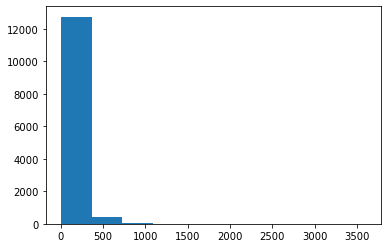

In [36]:
plt.hist(data.price)
plt.show()

In [37]:
data.price.max()

3600.0

In [38]:
data.price.sort_values()

10526       8.0
8594        9.0
12579      10.0
11091      10.0
4113       10.0
          ...  
3180     2700.0
11763    2736.0
13200    2800.0
11080    2912.0
13067    3600.0
Name: price, Length: 13246, dtype: float64

In [39]:
data[data.price==data.price.max()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13067,Plot Area,Ready To Move,Defence Colony,10,other,7150.0,13.0,0.0,3600.0


In [40]:
data[data.location=="Defence Colony"]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
465,Super built-up Area,Ready To Move,Defence Colony,2,Vantspa,1150.0,2.0,2.0,126.0
4195,Super built-up Area,Ready To Move,Defence Colony,4,Masta A,6600.0,4.0,0.0,986.0
5111,Built-up Area,Ready To Move,Defence Colony,2,other,1150.0,2.0,2.0,125.0
9490,Super built-up Area,Ready To Move,Defence Colony,4,other,2800.0,4.0,3.0,365.0
12759,Built-up Area,Ready To Move,Defence Colony,2,Inshath,1270.0,2.0,0.0,172.0
13067,Plot Area,Ready To Move,Defence Colony,10,other,7150.0,13.0,0.0,3600.0
13200,Plot Area,Ready To Move,Defence Colony,6,other,8000.0,6.0,3.0,2800.0


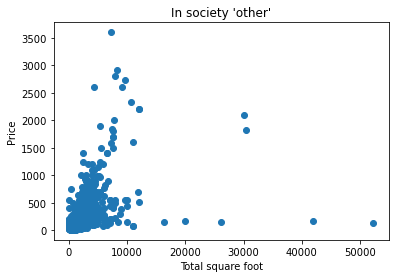

In [41]:
plt.scatter(sample_data.total_sqft,sample_data.price)
plt.title("In society 'other'")
plt.xlabel("Total square foot")
plt.ylabel("Price")
plt.show()

Here, we can coclude that there is no use with society column

In [42]:
data.area_type.value_counts()

Super built-up  Area    8740
Built-up  Area          2410
Plot  Area              2009
Carpet  Area              87
Name: area_type, dtype: int64

In [43]:
data.groupby("area_type").describe().transpose()

area_type         Built-up  Area  Carpet  Area    Plot  Area  \
size       count     2410.000000     87.000000   2009.000000   
           mean         2.787552      2.666667      4.060229   
           std          1.228421      1.394897      1.995477   
           min          1.000000      1.000000      1.000000   
           25%          2.000000      2.000000      3.000000   
           50%          3.000000      2.000000      4.000000   
           75%          3.000000      3.000000      5.000000   
           max         10.000000      9.000000     43.000000   
total_sqft count     2410.000000     87.000000   2009.000000   
           mean      1608.507469   1285.091954   1824.335490   
           std       1161.729169    784.706531   2119.294648   
           min          5.000000     15.000000      1.000000   
           25%       1053.500000    898.000000   1100.000000   
           50%       1288.500000   1150.000000   1200.000000   
           75%       1800.000000   1541.500000   2200.000000   
           max      35000.000000   4500.000000  52272.000000   
bath       count     2410.000000     87.000000   2009.000000   
           mean         2.649378      2.505747      3.893479   
           std          1.250774      1.170108      2.022681   
           min          1.000000      1.000000      1.000000   
           25%          2.000000      2.000000      3.000000   
           50%          2.000000      2.000000      4.000000   
           75%          3.000000      3.000000      5.000000   
           max         10.000000      9.000000     40.000000   
balcony    count     2410.000000     87.000000   2009.000000   
           mean         1.411618      1.321839      1.273270   
           std          0.913820      1.005731      0.999745   
           min          0.000000      0.000000      0.000000   
           25%          1.000000      1.000000      0.000000   
           50%          1.000000      1.000000      1.000000   
           75%          2.000000      2.000000      2.000000   
           max          3.000000      3.000000      3.000000   
price      count     2410.000000     87.000000   2009.000000   
           mean       103.988452     89.502356    209.368148   
           std        109.241929     73.446012    253.849250   
           min          9.000000     13.000000     10.500000   
           25%         46.625000     47.702500     85.000000   
           50%         70.000000     70.000000    140.000000   
           75%        120.000000    100.000000    240.000000   
           max       2050.000000    500.000000   3600.000000   

area_type         Super built-up  Area  
size       count           8740.000000  
           mean               2.517963  
           std                0.865889  
           min                1.000000  
           25%                2.000000  
           50%                2.000000  
           75%                3.000000  
           max               27.000000  
total_sqft count           8740.000000  
           mean            1473.701831  
           std              940.323748  
           min               34.000000  
           25%             1105.000000  
           50%             1280.000000  
           75%             1615.250000  
           max            42000.000000  
bath       count           8740.000000  
           mean               2.430320  
           std                0.970356  
           min                1.000000  
           25%                2.000000  
           50%                2.000000  
           75%                3.000000  
           max               27.000000  
balcony    count           8740.000000  
           mean               1.608924  
           std                0.789804  
           min                0.000000  
           25%                1.000000  
           50%                2.000000  
           75%                2.000000  
           max                3.000000  
price      count      

In [44]:
#dropping columns such as "availability" and "society"
data=data.drop(['availability','society'],axis=1)

In [45]:
data.sample(10)

,area_type,location,size,total_sqft,bath,balcony,price
3168,Super built-up Area,Narayanapura,2,1308.0,2.0,2.0,92.66
2332,Super built-up Area,Vittasandra,2,1404.0,2.0,1.0,75.00
13046,Super built-up Area,Horamavu Agara,3,1557.0,3.0,1.0,70.00
11858,Built-up Area,AECS Layout,3,2000.0,3.0,1.0,90.00
2542,Super built-up Area,KR Puram,2,1142.0,2.0,1.0,51.00
10873,Super built-up Area,Gunjur,3,1362.0,3.0,1.0,62.63
3019,Super built-up Area,ISRO Layout,2,1180.0,2.0,3.0,52.00
1467,Super built-up Area,Hebbal,3,1790.0,3.0,2.0,127.00
1995,Plot Area,Basaveshwara Nagar,7,2460.0,7.0,1.0,350.00
2017,Built-up Area,Kaverappa Layout,2,1012.0,2.0,1.0,59.00


In [46]:
data.shape

(13246, 7)

In [47]:
location_stats=data.location.value_counts(ascending=True)
location_stats

JP nagar 9th Phase,                   1
Hanuman Nagar                         1
Okalipura                             1
Housing Board Layout Vijay Nagar      1
Basaveswarnagar                       1
                                   ... 
Thanisandra                         233
Kanakpura Road                      266
Electronic City                     302
Sarjapur  Road                      392
Whitefield                          534
Name: location, Length: 1304, dtype: int64

**Here we can observe that many locations have only 1 house and hence complexity increases during one hot encoding.        
Therefore, locations with less than 10 houses are treated as "Other"**

In [48]:
location_stats[location_stats>10]

Kodigehalli                   11
Tindlu                        11
Nehru Nagar                   11
Marsur                        11
2nd Phase Judicial Layout     11
                            ... 
Thanisandra                  233
Kanakpura Road               266
Electronic City              302
Sarjapur  Road               392
Whitefield                   534
Name: location, Length: 241, dtype: int64

In [49]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

JP nagar 9th Phase,                  1
Hanuman Nagar                        1
Okalipura                            1
Housing Board Layout Vijay Nagar     1
Basaveswarnagar                      1
                                    ..
Gunjur Palya                        10
1st Block Koramangala               10
Ganga Nagar                         10
Naganathapura                       10
Basapura                            10
Name: location, Length: 1063, dtype: int64

In [50]:
data['location']=data['location'].apply(lambda x : 'Other' if x in location_stats_less_than_10 else x)

In [51]:
data.location.value_counts(ascending=True)

Tindlu                  11
HAL 2nd Stage           11
Kodigehalli             11
Pattandur Agrahara      11
Thyagaraja Nagar        11
                      ... 
Kanakpura Road         266
Electronic City        302
Sarjapur  Road         392
Whitefield             534
Other                 2896
Name: location, Length: 242, dtype: int64

In [52]:
#adding new column called "price_per_sqft"
data['price_per_sqft']=data['price']*100000/data['total_sqft']
data

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5,3453.0,4.0,0.0,231.00,6689.834926
13316,Super built-up Area,Other,4,3600.0,5.0,0.0,400.00,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,60.00,5258.545136
13318,Super built-up Area,Padmanabhanagar,4,4689.0,4.0,1.0,488.00,10407.336319


we knew that, atleast 300 sqft is required for one 1 BHK. If anything not satisfying this condition then it is considered as an outlier

In [53]:
#getting all the rows that doesnot satisfy the above condition
data[data["total_sqft"]/data["size"]<300]

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
9,Plot Area,Other,6,1020.0,6.0,0.0,370.0,36274.509804
45,Plot Area,HSR Layout,8,600.0,9.0,0.0,200.0,33333.333333
58,Plot Area,Murugeshpalya,6,1407.0,4.0,1.0,150.0,10660.980810
68,Plot Area,Other,8,1350.0,7.0,0.0,85.0,6296.296296
70,Plot Area,Other,3,500.0,3.0,2.0,100.0,20000.000000
...,...,...,...,...,...,...,...,...
13277,Plot Area,Other,7,1400.0,7.0,0.0,218.0,15571.428571
13279,Plot Area,Other,6,1200.0,5.0,0.0,130.0,10833.333333
13281,Plot Area,Margondanahalli,5,1375.0,5.0,1.0,125.0,9090.909091
13303,Plot Area,Vidyaranyapura,5,774.0,5.0,3.0,70.0,9043.927649


In [54]:
#removing outilers based on above condition
data=data[data["total_sqft"]/data["size"]>=300]
data.shape

(12462, 8)

we knew that, a house cannot have bathrooms more than number of bedrooms  + 2 (guest bathroom and extra).     
i.e number of bathrooms <= number of bedrooms + 2

In [55]:
#getting outliers based on above condition
data[data['bath']>data['size']+2]

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
1078,Plot Area,Other,9,3300.0,14.0,0.0,500.0,15151.515152
2620,Super built-up Area,Other,6,11338.0,9.0,1.0,1000.0,8819.897689
6838,Super built-up Area,Rajaji Nagar,5,7500.0,8.0,3.0,1700.0,22666.666667
7709,Built-up Area,Chikkabanavar,4,2460.0,7.0,2.0,80.0,3252.032520
9974,Plot Area,Other,3,2400.0,6.0,2.0,775.0,32291.666667
11366,Built-up Area,Nagasandra,4,7000.0,8.0,0.0,450.0,6428.571429
12103,Super built-up Area,Thanisandra,3,1806.0,6.0,2.0,116.0,6423.034330
12443,Plot Area,Other,4,4350.0,8.0,0.0,2600.0,59770.114943
13067,Plot Area,Other,10,7150.0,13.0,0.0,3600.0,50349.650350


In [56]:
#removing outliers based on above condition
data=data[data['bath']<=data['size']+2]
data.shape

(12453, 8)

In [57]:
data.sample(10)

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
10144,Super built-up Area,Ambedkar Nagar,3,1921.0,4.0,3.0,129.00,6715.252473
5897,Super built-up Area,Hebbal,2,1088.0,2.0,2.0,62.00,5698.529412
9926,Super built-up Area,Sector 2 HSR Layout,3,1515.0,2.0,3.0,69.00,4554.455446
8773,Super built-up Area,Whitefield,2,1227.0,2.0,2.0,70.00,5704.971475
4794,Super built-up Area,Kalyan nagar,4,2422.0,3.0,2.0,150.00,6193.228737
7265,Super built-up Area,7th Phase JP Nagar,2,1070.0,2.0,2.0,42.00,3925.233645
3436,Plot Area,Anandapura,2,1200.0,2.0,1.0,58.00,4833.333333
11076,Super built-up Area,Yelahanka,3,1756.0,3.0,2.0,66.73,3800.113895
4888,Super built-up Area,Sarjapur Road,2,1190.0,2.0,1.0,50.00,4201.680672
2894,Super built-up Area,Mahadevpura,1,730.0,1.0,1.0,35.00,4794.520548


In [58]:
def display_prices_plot_for_bhks(location):
    sub_data=data[data.location==location]
    grouped_data=sub_data.groupby("size")
    for size,sized_df in grouped_data:
        plt.scatter(sized_df.total_sqft,sized_df.price,label=str(size)+" BHK")
    plt.xlabel("Total square foot")
    plt.ylabel("Price in lakhs")
    plt.title(location)
    plt.legend()
    plt.show()

In [59]:
data.location.value_counts()

Other                   2562
Whitefield               531
Sarjapur  Road           388
Electronic City          293
Kanakpura Road           262
                        ... 
5th Block Hbr Layout       7
Thyagaraja Nagar           7
Vishwapriya Layout         7
Vishveshwarya Layout       7
Marsur                     5
Name: location, Length: 242, dtype: int64

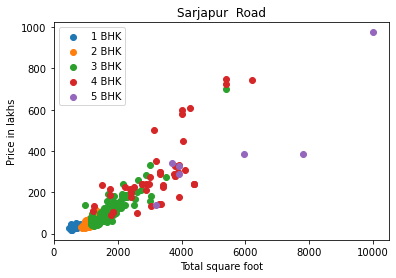

In [60]:
display_prices_plot_for_bhks("Sarjapur  Road")

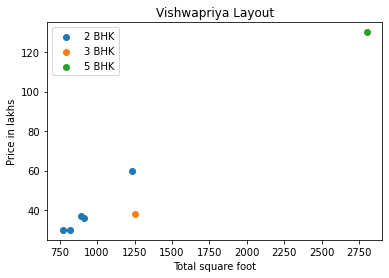

In [61]:
display_prices_plot_for_bhks("Vishwapriya Layout")

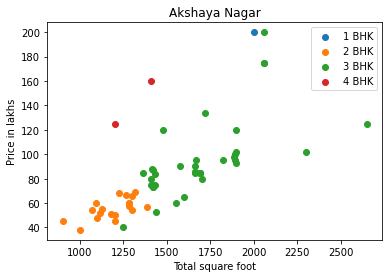

In [62]:
display_prices_plot_for_bhks("Akshaya Nagar")

In [77]:
def remove_outliers_based_on_areas(data):
    grouped_locations=data.groupby("location")
    final_df=pd.DataFrame()
    for location,location_df in grouped_locations:
        grouped_area_type=location_df.groupby("area_type")
        for area, area_df in grouped_area_type:
            min_cond=area_df.price_per_sqft>=area_df.price_per_sqft.mean()-area_df.price_per_sqft.std()
            max_cond=area_df.price_per_sqft<=area_df.price_per_sqft.mean()+area_df.price_per_sqft.std()
            sub_df=area_df[(min_cond) & (max_cond)]
            final_df=pd.concat([final_df,sub_df],ignore_index=True)
    return final_df

In [78]:
final_data=remove_outliers_based_on_areas(data)

In [79]:
final_data

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Plot Area,Devarachikkanahalli,2,1200.0,2.0,2.0,83.00,6916.666667
1,Plot Area,Devarachikkanahalli,3,1200.0,3.0,1.0,160.00,13333.333333
2,Super built-up Area,Devarachikkanahalli,3,1250.0,2.0,3.0,44.00,3520.000000
3,Super built-up Area,Devarachikkanahalli,2,1170.0,2.0,2.0,40.00,3418.803419
4,Super built-up Area,Devarachikkanahalli,3,1425.0,2.0,2.0,65.00,4561.403509
...,...,...,...,...,...,...,...,...
9576,Super built-up Area,Yeshwanthpur,2,1160.0,2.0,2.0,64.08,5524.137931
9577,Super built-up Area,Yeshwanthpur,3,1676.0,3.0,0.0,92.13,5497.016706
9578,Super built-up Area,Yeshwanthpur,3,2503.0,3.0,3.0,138.00,5513.383939
9579,Super built-up Area,Yeshwanthpur,3,1855.0,3.0,3.0,135.00,7277.628032


In [80]:
x=final_data.drop(['price','price_per_sqft','area_type'],axis=1)
x

,location,size,total_sqft,bath,balcony
0,Devarachikkanahalli,2,1200.0,2.0,2.0
1,Devarachikkanahalli,3,1200.0,3.0,1.0
2,Devarachikkanahalli,3,1250.0,2.0,3.0
3,Devarachikkanahalli,2,1170.0,2.0,2.0
4,Devarachikkanahalli,3,1425.0,2.0,2.0
...,...,...,...,...,...
9576,Yeshwanthpur,2,1160.0,2.0,2.0
9577,Yeshwanthpur,3,1676.0,3.0,0.0
9578,Yeshwanthpur,3,2503.0,3.0,3.0
9579,Yeshwanthpur,3,1855.0,3.0,3.0


In [81]:
y=final_data['price']
y

0        83.00
1       160.00
2        44.00
3        40.00
4        65.00
         ...  
9576     64.08
9577     92.13
9578    138.00
9579    135.00
9580     92.13
Name: price, Length: 9581, dtype: float64

In [82]:
x_final=pd.get_dummies(x,drop_first=True)
x_final

,size,total_sqft,bath,balcony,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,2,1200.0,2.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1200.0,3.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1250.0,2.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1170.0,2.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1425.0,2.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9576,2,1160.0,2.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9577,3,1676.0,3.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9578,3,2503.0,3.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9579,3,1855.0,3.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [83]:
x_final.shape

(9581, 245)

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x_final,y,test_size=0.15)

In [86]:
x_train.shape,x_test.shape

((8143, 245), (1438, 245))

In [87]:
y_train.shape,y_test.shape

((8143,), (1438,))

In [88]:
model=LinearRegression()

In [89]:
model.fit(x_train,y_train)

LinearRegression()

In [90]:
model.score(x_test,y_test)

0.717951438080234

In [91]:
location="Akshaya Nagar"
np.where(x_final.columns=="location_"+location)[0][0]

16

In [92]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()

In [93]:
enc.fit(x)

OneHotEncoder()

In [94]:
transformed=enc.transform(x).toarray()
transformed

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
enc.inverse_transform(transformed)

array([[' Devarachikkanahalli', 2, 1200.0, 2.0, 2.0],
       [' Devarachikkanahalli', 3, 1200.0, 3.0, 1.0],
       [' Devarachikkanahalli', 3, 1250.0, 2.0, 3.0],
       ...,
       ['Yeshwanthpur', 3, 2503.0, 3.0, 3.0],
       ['Yeshwanthpur', 3, 1855.0, 3.0, 3.0],
       ['Yeshwanthpur', 3, 1675.0, 3.0, 0.0]], dtype=object)

In [96]:
model1=LinearRegression()

In [97]:
model1.fit(transformed,y)

LinearRegression()

In [98]:
sample_predict=enc.transform([['Akshaya Nagar',4,1500,6,2]])

In [99]:
model1.predict(sample_predict)

array([130.75])

In [100]:
def predict(input_values):
    encoded_values=enc.transform([input_values])
    return model1.predict(encoded_values)

In [101]:
predict(['Akshaya Nagar',4,1500,6,2])

array([130.75])

In [102]:
from sklearn.pipeline import Pipeline
pl=Pipeline([
    ('encoder',OneHotEncoder()),
    ('model',LinearRegression())
])

In [104]:
pl.fit(x,y)

Pipeline(steps=[('encoder', OneHotEncoder()), ('model', LinearRegression())])

In [110]:
pl.predict([['Akshaya Nagar',4,1500,6,2]])

array([130.68154073])